# <center>Face spoofing Detection (VGG16) </center>

Face spoofing detection systems are used to secure biometric authentication systems. The proposed solution uses <b>CNN</b>, a Deep learning Network to find whether the face is spoofed or not.
<img src="./Resources/facespoof.png">

## Image Argumentation

Here we are loading the dataset using <b>ImageDataGenerator.flow_from_directory</b> function. Our dataset is not that big. It contains the follwing images:
    
    train images = 961 images in total (contains 2 classes)
        Face_Images = 299 images
        Mobile_Images = 662 images
    
    test images = 396 images in total (contains 2 classes)
        Face_Images = 120 images
        Mobile_Images = 276 images
        
        
By the dataset we can say that our dataset is not that balanced. But this was the dataset that was available. But our Model is still predicting well after conducting tests.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator()

In [3]:
test_datagen = ImageDataGenerator()

In [4]:
x_train = train_datagen.flow_from_directory('./data/data_train', target_size=(224,224),
                                           class_mode='categorical', batch_size=10)

Found 961 images belonging to 2 classes.


In [5]:
x_train.class_indices

{'Face_Images': 0, 'Mobile_Images': 1}

In [6]:
x_test = train_datagen.flow_from_directory('./data/data_test', target_size=(224,224),
                                           class_mode='categorical', batch_size=10)

Found 396 images belonging to 2 classes.


In [7]:
x_test.class_indices

{'Face_Images': 0, 'Mobile_Images': 1}

In [8]:
STEP_SIZE_TRAIN = x_train.n // x_train.batch_size
STEP_SIZE_TRAIN

96

In [9]:
STEP_SIZE_TEST = x_test.n // x_test.batch_size
STEP_SIZE_TEST

39

## Creating the Model

We are going to create a VGG16 Model with the following <b>architecture</b> :

    1. Convolution using 64 filters
    2. Convolution using 64 filters + Max pooling
    3. Convolution using 128 filters
    4. Convolution using 128 filters + Max pooling
    5. Convolution using 256 filters
    6. Convolution using 256 filters
    7. Convolution using 256 filters + Max pooling
    8. Convolution using 512 filters
    9. Convolution using 512 filters
    10. Convolution using 512 filters+Max pooling
    11. Convolution using 512 filters
    12. Convolution using 512 filters
    13. Convolution using 512 filters+Max pooling
    14. Fully connected with 256 nodes
    15. Fully connected with 256 nodes
    16. Output layer with Softmax activation with 2 nodes.

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')
model.trainable=False
## We Don't want to train the front 13 layers and we need to train only the last two layers

model = Sequential([
    model,
    Flatten(),
    Dense(units=256,activation='relu'),
    Dense(units=256,activation='relu'),
    Dense(units=2,activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________
None


## Fitting the Model

In [12]:
history = model.fit_generator(generator=x_train,steps_per_epoch=STEP_SIZE_TRAIN, validation_data = x_test, validation_steps=STEP_SIZE_TEST,epochs=5)

Epoch 1/5


C:\Users\sanja\AppData\Local\Temp/ipykernel_14816/3241022557.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=x_train,steps_per_epoch=STEP_SIZE_TRAIN, validation_data = x_test, validation_steps=STEP_SIZE_TEST,epochs=5)


96/96 [==============================] - 173s 2s/step - loss: 1.8846 - accuracy: 0.9695 - val_loss: 0.6682 - val_accuracy: 0.9949
Epoch 2/5
96/96 [==============================] - 172s 2s/step - loss: 0.4299 - accuracy: 0.9916 - val_loss: 1.0494 - val_accuracy: 0.9923
Epoch 3/5
96/96 [==============================] - 170s 2s/step - loss: 0.0908 - accuracy: 0.9989 - val_loss: 1.4736 - val_accuracy: 0.9923
Epoch 4/5
96/96 [==============================] - 170s 2s/step - loss: 1.5042e-09 - accuracy: 1.0000 - val_loss: 1.4727 - val_accuracy: 0.9923
Epoch 5/5
96/96 [==============================] - 174s 2s/step - loss: 1.5042e-09 - accuracy: 1.0000 - val_loss: 1.4727 - val_accuracy: 0.9923


## Visualize the Model accuracy per epoch

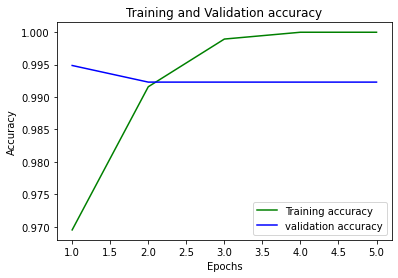

In [16]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Saving the Model

In [17]:
model.save('fsdvgg16.h5')

## Testing the Model

### 1.Testing Using a Image

#### 1st prediction

In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

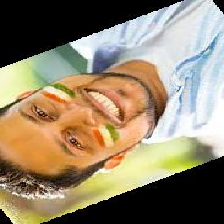

In [29]:
img = image.load_img('./data/data_test/Face_images/32a9849f-9e54-41e6-91bc-dbc011a6b9c6.jpg',target_size=(224,224))
img

In [28]:
model = load_model('fsdvgg16.h5')

In [30]:
x = image.img_to_array(img)
x

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 4.,  0.,  0.],
        [ 3.,  0.,  0.],
        [ 4.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 5.,  4.,  2.],
        [ 3.,  0.,  0.],
        [ 3.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 1.,  0.,  0.],
        [10.,  6.,  7.],
        [ 9.,  5.,  6.]],

       ...,

       [[ 0.,  2.,  0.],
        [ 0.,  1.,  0.],
        [ 9.,  8.,  6.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [31]:
x.ndim

3

In [32]:
x = np.expand_dims(x,axis=0)
x

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 4.,  0.,  0.],
         [ 3.,  0.,  0.],
         [ 4.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 5.,  4.,  2.],
         [ 3.,  0.,  0.],
         [ 3.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 1.,  0.,  0.],
         [10.,  6.,  7.],
         [ 9.,  5.,  6.]],

        ...,

        [[ 0.,  2.,  0.],
         [ 0.,  1.,  0.],
         [ 9.,  8.,  6.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 1.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 1.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
        

In [33]:
x.ndim

4

In [34]:
pred = np.argmax(model.predict(x),axis=1)
pred

array([0], dtype=int64)

In [35]:
index = ['Face_Images', 'Mobile_Images']

In [36]:
index[pred[0]]

'Face_Images'

#### 2nd prediction

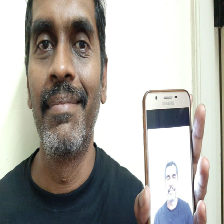

In [38]:
img = image.load_img('./data/data_test/Mobile_images/5b1ef249-8183-4f4d-807e-73daa51a8434.jpg',target_size=(224,224))
img

In [39]:
x = image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 15.,  20.,  14.],
        [ 17.,  19.,  14.],
        [ 18.,  17.,  13.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 17.,  19.,  14.],
        [ 18.,  19.,  14.],
        [ 15.,  14.,  10.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 18.,  19.,  14.],
        [ 20.,  19.,  15.],
        [ 41.,  37.,  34.]],

       ...,

       [[ 37.,  51.,  60.],
        [ 33.,  48.,  55.],
        [ 35.,  50.,  55.],
        ...,
        [ 91.,  90.,  70.],
        [ 52.,  49.,  34.],
        [125., 118.,  99.]],

       [[ 38.,  52.,  61.],
        [ 35.,  50.,  55.],
        [ 37.,  53.,  52.],
        ...,
        [103., 102.,  82.],
        [ 51.,  48.,  33.],
        [124., 117.,  98.]],

       [[ 38.,  52.,  63.],
        [ 32.,  47.,  50.],
        [ 32.,  

In [40]:
x.ndim

3

In [41]:
x = np.expand_dims(x,axis=0)
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [ 15.,  20.,  14.],
         [ 17.,  19.,  14.],
         [ 18.,  17.,  13.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [ 17.,  19.,  14.],
         [ 18.,  19.,  14.],
         [ 15.,  14.,  10.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [ 18.,  19.,  14.],
         [ 20.,  19.,  15.],
         [ 41.,  37.,  34.]],

        ...,

        [[ 37.,  51.,  60.],
         [ 33.,  48.,  55.],
         [ 35.,  50.,  55.],
         ...,
         [ 91.,  90.,  70.],
         [ 52.,  49.,  34.],
         [125., 118.,  99.]],

        [[ 38.,  52.,  61.],
         [ 35.,  50.,  55.],
         [ 37.,  53.,  52.],
         ...,
         [103., 102.,  82.],
         [ 51.,  48.,  33.],
         [124., 117.,  98.]],

        [[ 38.,  52.,  63.],
       

In [42]:
x.ndim

4

In [43]:
pred = np.argmax(model.predict(x),axis=1)
pred

array([1], dtype=int64)

In [44]:
index = ['Face_Images', 'Mobile_Images']

In [45]:
index[pred[0]]

'Mobile_Images'

### 2. Testing using Webcam

In [46]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

trained_face_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = load_model('fsdvgg16.h5')
video = cv2.VideoCapture(0)
index = ['Face_Images', 'Mobile_Images']


while 1:
    succes, frame = video.read()
    grayscaled_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)
    cv2.imwrite('image.jpg',frame)
    img = image.load_img('image.jpg', target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = np.argmax(model.predict(x),axis=1)
    z = pred[0]
    for (x, y, w, h) in face_coordinates:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame,str(index[z]), (x,y), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        ## img,text,startPT,fontstyle,scale(size),color,width
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

## Output Results

<img src='./Resources/vgg1.png'>

<img src='./Resources/vgg2.png'>

<img src='./Resources/vgg3.png'>

<img src='./Resources/vgg4.png'>